In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [2]:
data = keras.datasets.cifar10

In [3]:
(train_images,train_labels),(test_images,test_labels) = data.load_data()

In [4]:
train_images.shape

(50000, 32, 32, 3)

In [5]:
train_images[0,30,17]

array([139,  99,  60], dtype=uint8)

In [6]:
train_labels[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [7]:
class_names = ['Airplane','Automobiles','Bird','Cat','Deer','Dod','Frog','Horse','Ship','Truck']

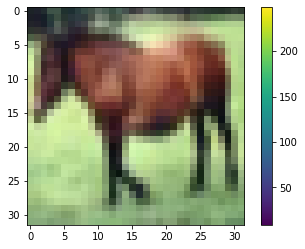

In [8]:
plt.figure()
plt.imshow(train_images[7])
plt.colorbar()
plt.show()

In [9]:
train_images = train_images/255.0
test_images = test_images/255.0

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [12]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images,train_labels,epochs=10,
                    validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 78s 49ms/step - loss: 1.5260 - accuracy: 0.4407 - val_loss: 1.3435 - val_accuracy: 0.5198
Epoch 2/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.1547 - accuracy: 0.5898 - val_loss: 1.1028 - val_accuracy: 0.6184
Epoch 3/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.9956 - accuracy: 0.6491 - val_loss: 0.9473 - val_accuracy: 0.6664
Epoch 4/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.9002 - accuracy: 0.6834 - val_loss: 0.9490 - val_accuracy: 0.6692
Epoch 5/10
1563/1563 [==============================] - 74s 48ms/step - loss: 0.8284 - accuracy: 0.7113 - val_loss: 0.8945 - val_accuracy: 0.6918
Epoch 6/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.7780 - accuracy: 0.7278 - val_loss: 0.8888 - val_accuracy: 0.6929
Epoch 7/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.7291 - accuracy: 0.7446 - val_loss: 0.8736 -

In [15]:
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)
print(test_acc)

313/313 - 4s - loss: 0.8724 - accuracy: 0.7109 - 4s/epoch - 12ms/step
0.7109000086784363


In [17]:
predictions = model.predict(test_images)

In [18]:
predictions[0]

array([-0.33728248, -4.883979  ,  0.19072063,  4.7687087 , -2.80615   ,
        2.8729408 ,  1.0719212 , -2.4860096 , -0.14156398, -3.318888  ],
      dtype=float32)

Truck


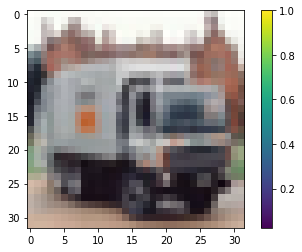

In [19]:
print(class_names[np.argmax(predictions[11])])
plt.figure()
plt.imshow(test_images[11])
plt.colorbar()
plt.show()